In [4]:
import os 
import cv2
import csv
import PIL
import numpy as np

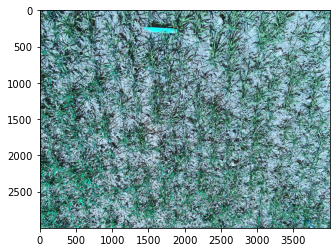

In [2]:
from cv2 import IMREAD_COLOR, imread, imshow, waitKey
import matplotlib.pyplot as plt

file = '/Users/mehdisaberioon/Library/CloudStorage/OneDrive-Personal/Projects/STEROPES/DATA/field_photos_Nouzilly_controlplus_liqmanure21jul22/Liq_manure/20220309_Liq_manure143133.jpg'
img = imread(file, IMREAD_COLOR)

plt.imshow(img)


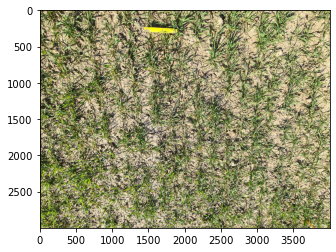

In [3]:
# convert image to RGB format 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [6]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)

(12000000, 3)


In [12]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

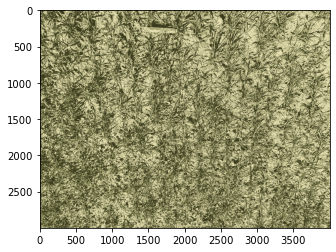

In [13]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]


# reshape back to the original image dimension
segmented_image = segmented_image.reshape(img.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

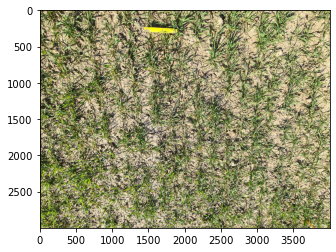

In [16]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 3
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(img.shape)
# show the image
plt.imshow(masked_image)
plt.show()